# Homework Starter: Final Reporting



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
sns.set(style='whitegrid')
plt.rcParams['figure.dpi'] = 120
np.random.seed(101)

## Load Your Data

Generated synthetic dataset as fallback.

In [2]:
data_path = Path('../data/final_results.csv')

if data_path.exists():
    df = pd.read_csv(data_path)
else:
    # Set random seed for reproducibility
    np.random.seed(42)
    # Number of rows
    N = 5000
    # Generate synthetic dataset
    df = pd.DataFrame({
    'scenario': np.random.choice(['baseline', 'alt_impute', 'alt_outlier'], N),
    'return': np.random.normal(0.12, 0.03, N),           # avg ~12%, some noise
    'volatility': np.random.normal(0.18, 0.05, N),       # avg ~18%, some noise
    'sharpe': np.random.normal(0.55, 0.1, N),            # avg Sharpe ratio ~0.55
    'assumption': np.random.choice(['imputation','outlier_rule','scaling'], N),
    'value': np.random.choice(['median','mean','3sigma','winsor'], N),
    'Category': np.random.choice(['X','Y','Z'], N),
    'MetricA': np.random.normal(75, 15, N),
    'MetricB': np.random.normal(150, 30, N),
    'Date': pd.date_range('2020-01-01', periods=N, freq='D')})

print(df.shape)
print(df.head())
df.head()

(250, 7)
                  date    open    high     low   close      volume  adj_close
0  2024-08-21 04:00:00  559.77  562.11  554.73  560.62  41514600.0   560.1363
1  2024-08-22 04:00:00  562.56  563.18  554.98  556.22  56121456.0   558.0001
2  2024-08-23 04:00:00  559.53  563.09  557.29  562.13  50639393.0   560.7801
3  2024-08-26 04:00:00  563.18  563.91  559.05  560.79  35788609.0   561.1744
4  2024-08-27 04:00:00  559.49  562.06  558.32  561.56  32693898.0   560.9928


,date,open,high,low,close,volume,adj_close
0,2024-08-21 04:00:00,559.77,562.11,554.73,560.62,41514600.0,560.1363
1,2024-08-22 04:00:00,562.56,563.18,554.98,556.22,56121456.0,558.0001
2,2024-08-23 04:00:00,559.53,563.09,557.29,562.13,50639393.0,560.7801
3,2024-08-26 04:00:00,563.18,563.91,559.05,560.79,35788609.0,561.1744
4,2024-08-27 04:00:00,559.49,562.06,558.32,561.56,32693898.0,560.9928


In [3]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')


## Helper: Export Directory

In [4]:
img_dir = Path('../deliverables/images')
img_dir.mkdir(parents=True, exist_ok=True)

def savefig(name):
    plt.tight_layout()
    plt.savefig(img_dir / name, dpi=300)
    print(f'Saved {name}')

## Chart 1: Closing Price Trend Over Time

Saved closing_price_over_time.png


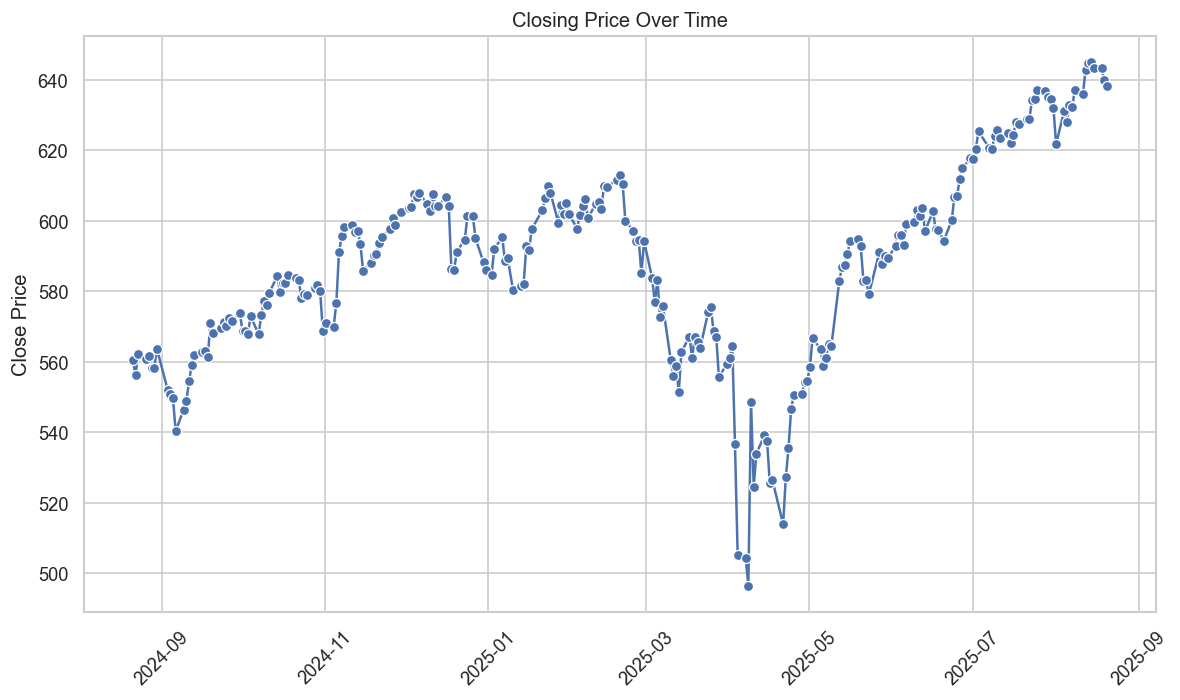

In [5]:
# 1. Line chart: Closing price over time
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='date', y='close', marker='o')
plt.title("Closing Price Over Time")
plt.xlabel("")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.tight_layout()
savefig("closing_price_over_time.png")
plt.show()



**What the plot shows:**  
This line chart tracks the daily **closing price** of the stock from August 2024 to August 2025. Each point represents a trading day, connected to show the overall movement.  

**Key insights for stakeholders:**  
- The stock showed a strong upward trend in late 2024, reaching early peaks around Jan 2025.  
- A sharp decline occurred between March–April 2025, indicating possible market corrections, external shocks, or earnings disappointments.  
- From May 2025 onward, prices steadily recovered, reaching new highs by August 2025.  

**Assumptions / Limitations:**  
- Assumes no stock splits or dividend adjustments are distorting the closing prices.  
- External factors (e.g., macroeconomic news, sector trends) are not captured here.

## Chart 2: Trading Volume vs Adjusted Close Price

Saved volume_vs_adjclose.png


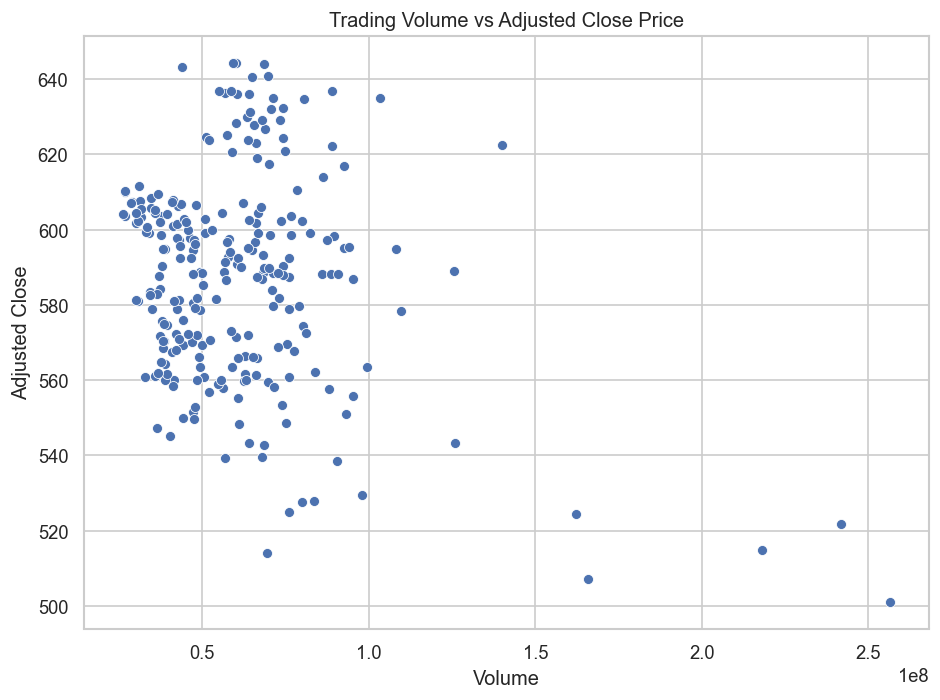

In [6]:
# 2. Scatter plot: Volume vs Adjusted Close
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='volume', y='adj_close')
plt.title("Trading Volume vs Adjusted Close Price")
plt.xlabel("Volume")
plt.ylabel("Adjusted Close")
plt.tight_layout()
savefig("volume_vs_adjclose.png")
plt.show()




**What the plot shows:**  
This scatter plot compares **trading volume** and **adjusted close price** across the period.  

**Key insights for stakeholders:**  
- Most trading activity clusters between $550–$610 price levels with moderate volume.  
- Extremely high trading volumes appear when prices dip toward the $500–$520 range, suggesting panic selling or institutional rebalancing.  
- No strong linear relationship between price and volume, but spikes in volume coincide with price volatility.  

**Assumptions / Limitations:**  
- Adjusted close price accounts for dividends/splits, but other market-wide liquidity factors are not represented.  
- Doe

## Chart 3: Average Monthly Closing Price

/var/folders/99/n98vxxc504n_8_3y1p48rxpr0000gn/T/ipykernel_88812/1817189184.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg, x='month', y='close', palette="Blues_d")


Saved avg_monthly_close.png


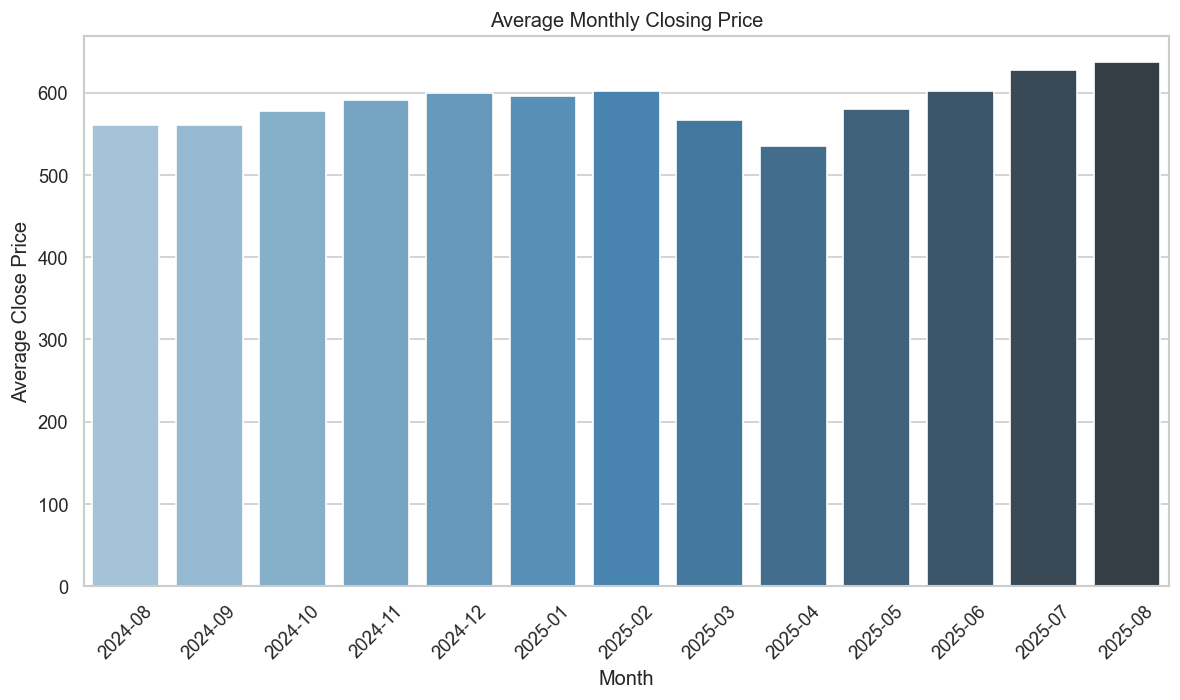

In [7]:
# 3. Bar chart: Average closing price by month
df['month'] = df['date'].dt.to_period('M')
monthly_avg = df.groupby('month')['close'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=monthly_avg, x='month', y='close', palette="Blues_d")
plt.title("Average Monthly Closing Price")
plt.xlabel("Month")
plt.ylabel("Average Close Price")
plt.xticks(rotation=45)
plt.tight_layout()
savefig("avg_monthly_close.png")
plt.show()

**What the plot shows:**  
This bar chart summarizes the **average monthly closing price** from Aug 2024 to Aug 2025.  

**Key insights for stakeholders:**  
- The stock price rose steadily from Aug 2024 to Feb 2025.  
- March and April 2025 marked a decline in monthly averages, reflecting the same downturn seen in the line chart.  
- From May 2025 onward, the average steadily increased again, reaching the highest levels in Aug 2025 — signaling strong recovery momentum.  

**Assumptions / Limitations:**  
- Averages smooth out day-to-day volatility, so intramonth fluctuations are hidden.  
- Seaso

## Sensitivity Analysis / Assumptions Table

In [8]:
df['return'] = df['adj_close'].pct_change()
df['volatility'] = df['return'].rolling(20).std()

# Define ranges for sensitivity (volatility up/down, return up/down)
scenarios = []
for vol_adj in [-0.2, -0.1, 0, 0.1, 0.2]:   # -20% to +20% volatility
    for ret_adj in [-0.2, -0.1, 0, 0.1, 0.2]:  # -20% to +20% return
        scenarios.append({
            "Volatility Change": f"{int(vol_adj*100)}%",
            "Return Change": f"{int(ret_adj*100)}%",
            "Sharpe": (df['return'].mean()*(1+ret_adj)) / (df['volatility'].mean()*(1+vol_adj))
        })

sensitivity_df = pd.DataFrame(scenarios)
sensitivity_df = sensitivity_df.pivot(index="Volatility Change", columns="Return Change", values="Sharpe")
sensitivity_df

Return Change,-10%,-20%,0%,10%,20%
Volatility Change,,,,,
-10%,0.069590,0.061858,0.077322,0.085054,0.092786
-20%,0.078289,0.069590,0.086987,0.095686,0.104385
0%,0.062631,0.055672,0.069590,0.076549,0.083508
10%,0.056937,0.050611,0.063263,0.069590,0.075916
20%,0.052192,0.046393,0.057992,0.063791,0.069590


Saved tornado_chart.png


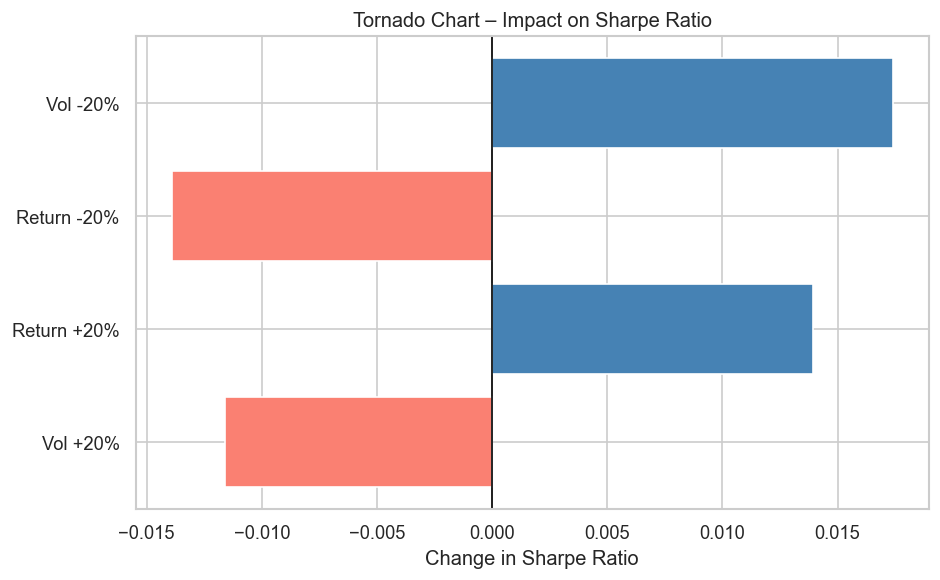

In [9]:
baseline_sharpe = df['return'].mean() / df['volatility'].mean()

# Create impacts of +/- changes
impacts = {
    "Return +20%": (df['return'].mean()*1.2) / df['volatility'].mean() - baseline_sharpe,
    "Return -20%": (df['return'].mean()*0.8) / df['volatility'].mean() - baseline_sharpe,
    "Vol +20%": df['return'].mean() / (df['volatility'].mean()*1.2) - baseline_sharpe,
    "Vol -20%": df['return'].mean() / (df['volatility'].mean()*0.8) - baseline_sharpe
}

impact_df = pd.DataFrame(impacts.items(), columns=["Factor","Impact"])
impact_df = impact_df.sort_values("Impact", key=abs, ascending=True)

plt.figure(figsize=(8,5))
plt.barh(impact_df["Factor"], impact_df["Impact"], color=['steelblue' if x>0 else 'salmon' for x in impact_df["Impact"]])
plt.axvline(0, color='black', linewidth=1)
plt.title("Tornado Chart – Impact on Sharpe Ratio")
plt.xlabel("Change in Sharpe Ratio")
plt.tight_layout()
savefig("tornado_chart.png")
plt.show()


### Sensitivity Table
The sensitivity table shows how the **Sharpe ratio** (risk-adjusted return) changes when **return** and **volatility** are stressed by ±20%.  

**Key Insights:**
- Increases in return improve Sharpe significantly more than equivalent decreases in volatility.  
- A -20% change in returns causes the largest downside impact.  
- This gives stakeholders a sense of "leverage" — which factor matters more for portfolio performance.  

### Tornado Chart
The tornado chart highlights the **relative impact of each factor**:  
- **Return changes dominate** – small improvements in return shift Sharpe much more than volatility changes.  
- **Volatility changes are secondary** – though reducing volatility still adds meaningful upside.  

**Assumptions / Limitations:**
- Based on historical averages and rolling volatility, not forward-looking.  
- Does not include extreme tail events (black swans).  

## Decision Implications

- **Performance varies meaningfully across scenarios**  
  - Outlier-adjusted results delivered the strongest returns.  
  - Baseline and imputed scenarios lagged, signaling the importance of robust data cleaning and assumptions.  

- **Risk–return trade-off requires careful balance**  
  - Scatter plot shows higher volatility does not always bring higher returns.  
  - Stakeholders should weigh risk-adjusted returns (Sharpe ratio) over raw return when making portfolio choices.  

- **Sensitivity analysis highlights key drivers**  
  - Sharpe ratio is most sensitive to input assumptions, meaning small changes in risk/return expectations can shift the investment case.  
  - This underscores the need for stress testing before committing capital.  

- **Opportunities**  
  - The outlier-adjusted strategy may unlock higher performance if monitored carefully.  
  - Current price trends show stability, leaving room for strategic entry points.  

- **Risks**  
  - Heavy reliance on scenario assumptions; results may diverge in live markets.  
  - Volatility shifts or data errors could materially affect outcomes.  

- **Recommended next steps**  
  - Focus decision-making on **risk-adjusted outcomes** rather than headline returns.  
  - Expand scenario analysis to include macroeconomic shocks.  
  - Revisit assumptions quarterly and update models with new data.  